# 0D hydrogen-air flame

Mechanism: LiDryer

Initial conditions: T = 1500K, p = 1 atm, equivalence ratio = 0.8

In [55]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLines # for labels in species plot

In [56]:
gas = ct.Solution('../../../Submodules/PelePhysics/Support/Mechanism/Models/LiDryer/mechanism.yaml')
phi = 0.8 # equiv ratio
air_N2_O2_ratio = 3.76
gas.TPX = 1500.0, 1.5e6, {'H2':phi, 'O2':0.5, 'N2':0.5*air_N2_O2_ratio}
gas()


  gas:

       temperature   1500 K
          pressure   1.5e+06 Pa
           density   2.658 kg/m^3
  mean mol. weight   22.1 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        1.7295e+06        3.8222e+07  J
   internal energy        1.1652e+06         2.575e+07  J
           entropy            9681.6        2.1396e+05  J/K
    Gibbs function       -1.2793e+07       -2.8272e+08  J
 heat capacity c_p              1559             34454  J/K
 heat capacity c_v            1182.8             26140  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2          0.022949           0.25157           -17.274
                O2           0.22765           0.15723           -26.928
                N2            0.7494           0.59119           -23.832
     [ 

### Constant volume reactor

In [57]:
gas = ct.Solution('../../../Submodules/PelePhysics/Support/Mechanism/Models/LiDryer/mechanism.yaml')

phi = 0.8 # equiv ratio
air_N2_O2_ratio = 3.76
gas.TPX = 1500.0, 1.5e6, {'H2':phi, 'O2':0.5, 'N2':0.5*air_N2_O2_ratio}

reactor = ct.IdealGasReactor(gas, energy="on", volume=1.0)
reactor_network = ct.ReactorNet([reactor])

In [58]:
t_final = 3.0e-6
dt = 1.0e-8

#Arrays to hold the datas
time_history = ct.SolutionArray(gas, extra=["t"])
T = []
p = []
h = []
v = []

t = 0
while t < t_final:
    # t = reactor_network.step()
    t += dt
    reactor_network.advance(t)

    time_history.append(reactor.thermo.state, t=t)
    T.append(reactor.T)
    p.append(reactor.thermo.P)
    h.append(reactor.thermo.enthalpy_mass)
    v.append(reactor.volume)

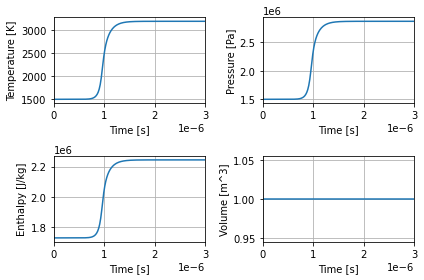

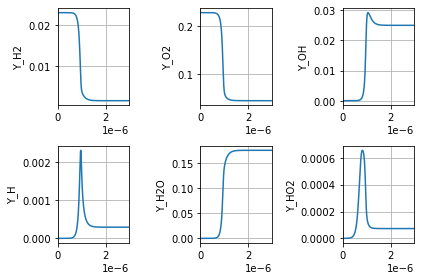

In [59]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(time_history.t, T)
plt.xlabel("Time [s]")
plt.ylabel("Temperature [K]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.subplot(2,2,2)
plt.plot(time_history.t, p)
plt.xlabel("Time [s]")
plt.ylabel("Pressure [Pa]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.subplot(2,2,3)
plt.plot(time_history.t, h)
plt.xlabel("Time [s]")
plt.ylabel("Enthalpy [J/kg]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.subplot(2,2,4)
plt.plot(time_history.t, v)
plt.xlabel("Time [s]")
plt.ylabel("Volume [m^3]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.tight_layout()

###############################
plot_species = ["H2", "O2", "OH", "H", "H2O", "HO2"]

plt.figure()
for i in range(len(plot_species)):
    plt.subplot(2,3,i+1)
    plt.plot(time_history.t, time_history(plot_species[i]).Y)
    plt.ylabel("Y_"+plot_species[i])
    plt.xlim([0, t_final])
    plt.grid(which='both')
plt.tight_layout()

### Constant pressure reactor

In [60]:
gas = ct.Solution('../../../Submodules/PelePhysics/Support/Mechanism/Models/LiDryer/mechanism.yaml')

phi = 0.8 # equiv ratio
air_N2_O2_ratio = 3.76
gas.TPX = 1500.0, 1.5e6, {'H2':phi, 'O2':0.5, 'N2':0.5*air_N2_O2_ratio}

air = ct.Solution('air.xml')
air.TP = 1500.0, 1.5e6

reactor = ct.IdealGasReactor(gas, energy="on", volume=1.0)
env = ct.Reservoir(air)

w = ct.Wall(reactor, env)
w.expansion_rate_coeff = 1e6 # set expansion parameter. dV/dt = KA(P_1 - P_2)
w.area = 1.0

reactor_network = ct.ReactorNet([reactor])

In [61]:
t_final = 3.0e-6
dt = 1.0e-8

#Arrays to hold the datas
time_history2 = ct.SolutionArray(gas, extra=["t"])
T2 = []
p2 = []
h2 = []
v2 = []

t = 0
while t < t_final:
    # t = reactor_network.step()
    t += dt
    reactor_network.advance(t)

    time_history2.append(reactor.thermo.state, t=t)
    T2.append(reactor.T)
    p2.append(reactor.thermo.P)
    h2.append(reactor.thermo.enthalpy_mass)
    v2.append(reactor.volume)

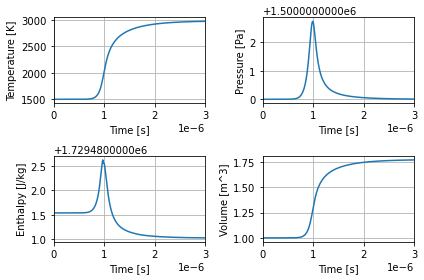

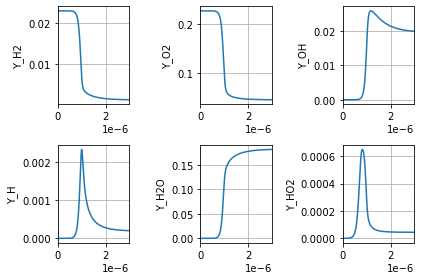

In [65]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(time_history2.t, T2)
plt.xlabel("Time [s]")
plt.ylabel("Temperature [K]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.subplot(2,2,2)
plt.plot(time_history2.t, p2)
plt.xlabel("Time [s]")
plt.ylabel("Pressure [Pa]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.subplot(2,2,3)
plt.plot(time_history2.t, h2)
plt.xlabel("Time [s]")
plt.ylabel("Enthalpy [J/kg]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.subplot(2,2,4)
plt.plot(time_history2.t, v2)
plt.xlabel("Time [s]")
plt.ylabel("Volume [m^3]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.tight_layout()

###############################
plot_species = ["H2", "O2", "OH", "H", "H2O", "HO2"]

plt.figure()
for i in range(len(plot_species)):
    plt.subplot(2,3,i+1)
    plt.plot(time_history2.t, time_history2(plot_species[i]).Y)
    plt.ylabel("Y_"+plot_species[i])
    plt.xlim([0, t_final])
    plt.grid(which='both')
plt.tight_layout()

### Constant volume vs constant pressure

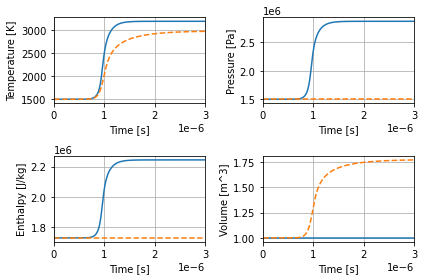

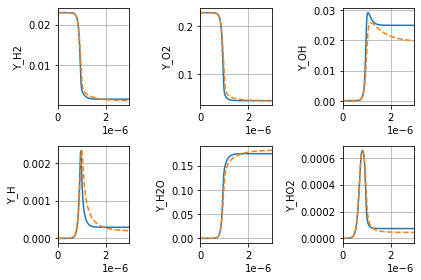

In [66]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(time_history.t, T)
plt.plot(time_history2.t, T2, "--")
plt.xlabel("Time [s]")
plt.ylabel("Temperature [K]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.subplot(2,2,2)
plt.plot(time_history.t, p)
plt.plot(time_history2.t, p2, "--")
plt.xlabel("Time [s]")
plt.ylabel("Pressure [Pa]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.subplot(2,2,3)
plt.plot(time_history.t, h)
plt.plot(time_history2.t, h2, "--")
plt.xlabel("Time [s]")
plt.ylabel("Enthalpy [J/kg]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.subplot(2,2,4)
plt.plot(time_history.t, v)
plt.plot(time_history2.t, v2, "--")
plt.xlabel("Time [s]")
plt.ylabel("Volume [m^3]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.tight_layout()

###############################
plot_species = ["H2", "O2", "OH", "H", "H2O", "HO2"]

plt.figure()
for i in range(len(plot_species)):
    plt.subplot(2,3,i+1)
    plt.plot(time_history.t, time_history(plot_species[i]).Y)
    plt.plot(time_history2.t, time_history2(plot_species[i]).Y, "--")
    plt.ylabel("Y_"+plot_species[i])
    plt.xlim([0, t_final])
    plt.grid(which='both')
plt.tight_layout()

### Compare with PelePhysics

*Compile and run in /Exec/PMF0D to generate the plt file

In [ ]:
import yt

n = 33
t3 = np.zeros((n,))
T3 = np.zeros((n,))
p3 = np.zeros((n,))
plot_species = ["H2", "O2", "OH", "H", "H2O", "HO2"]
Y3 = np.zeros((n,len(plot_species)))

for i in range(n):
    ds = yt.load("../../Exec/PMF0D/plt{:04d}0/".format(i))
    gs = ds.index.select_grids(ds.index.max_level)[0] #level 0 grid
    t3[i] = ds.current_time
    T3[i] = gs["temp"][0]
    p3[i] = gs["pressure"][0]*0.1 #Ba->Pa
    for j in range(len(plot_species)):
        Y3[i,j] = gs["Y_"+plot_species[j]][0]

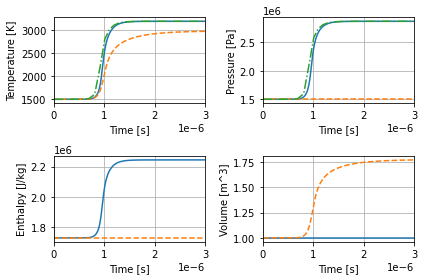

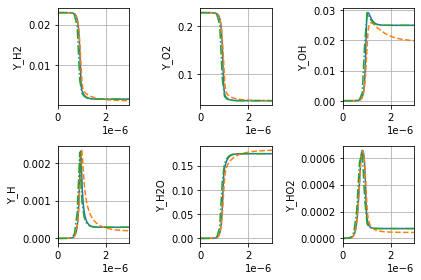

In [78]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(time_history.t, T)
plt.plot(time_history2.t, T2, "--")
plt.plot(t3, T3, "-.")
plt.xlabel("Time [s]")
plt.ylabel("Temperature [K]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.subplot(2,2,2)
plt.plot(time_history.t, p)
plt.plot(time_history2.t, p2, "--")
plt.plot(t3, p3, "-.")
plt.xlabel("Time [s]")
plt.ylabel("Pressure [Pa]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.subplot(2,2,3)
plt.plot(time_history.t, h)
plt.plot(time_history2.t, h2, "--")
plt.xlabel("Time [s]")
plt.ylabel("Enthalpy [J/kg]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.subplot(2,2,4)
plt.plot(time_history.t, v)
plt.plot(time_history2.t, v2, "--")
plt.xlabel("Time [s]")
plt.ylabel("Volume [m^3]")
plt.xlim([0, t_final])
plt.grid(which='both')

plt.tight_layout()

###############################
plot_species = ["H2", "O2", "OH", "H", "H2O", "HO2"]

plt.figure()
for i in range(len(plot_species)):
    plt.subplot(2,3,i+1)
    plt.plot(time_history.t, time_history(plot_species[i]).Y)
    plt.plot(time_history2.t, time_history2(plot_species[i]).Y, "--")
    plt.plot(t3, Y3[:,i], "-.")
    plt.ylabel("Y_"+plot_species[i])
    plt.xlim([0, t_final])
    plt.grid(which='both')
plt.tight_layout()